In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt

(10 pts) Presentation and Readability
a. Ensure the Jupyter Notebook is well-organized, with appropriate headings, clear
explanations, and attention to detail.
b. Formatting and Layout: Use clean formatting and provide sufficient explanations to
make your work easy to follow.

In [26]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)


In [27]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Central Research Question

20 points: Research Question & Hypotheses + Data Description
a. Formulate a Central Research Question: Your project should revolve around a
central research question/theme (e.g., “What factors influence employee retention?”
“How can we reduce customer churn?”) Points awarded on clarity and relevance.
b. Hypothesis Development: Develop 3 hypotheses that you aim to test using the
data. Each hypothesis should be logically connected to the research question for the
above questions.
c. Explain your dataset(s): What is the dataset about? What are the variables of
interest? Provide a data dictionary to define each variable’s meaning.
d. Define the unit of analysis: Clarify the unit of analysis in your dataset (what does
each observation represent)? You may need to do this repeatedly if you transform
your data.
Points are awarded based on clarity and brevity

Central Research Question: What factors of greenhouse gas emissions affect climate change?

# Data Processing and Prep

(20 pts.) Data Preparation.
a. Report all code related to cleaning and preparing the data. This may include creating
new columns, cleaning existing ones, handling missing data and/or filtering data.
Your data preparation should be performed directly in the notebook.
Points are awarded based on clarity, brevity, and showing that you can use the
techniques learned in class.


In this analysis, we utilized the EPA website and API to acquire temperature data by state, alongside sector-specific data related to carbon and other gas emissions. The raw data, provided in CSV and Excel formats, was processed into structured Pandas DataFrames for analysis. To reshape and organize the data for time-series analysis, we used the melt method on datasets like sectoral greenhouse gas emissions. For instance, the un_sector.melt method transformed wide-format data into a long format, using columns such as sector, geo_ref, and ghg_category as identifiers, and pivoting year-based columns into a unified Year column with corresponding emission values. This allowed for streamlined analysis of emissions trends over time. Using Python, we also employed various groupby statements to segment and analyze the data further, enabling deeper insights into trends and correlations across states and sectors. We also handled missing values by dropping them from the dataset.

# Download and Unzip State by State dataset

In [28]:
# RUN ONLY ONCE

# import requests
# from bs4 import BeautifulSoup
# import os
# import zipfile
# # Download the additional ZIP file
# additional_zip_url = 'https://www.epa.gov/system/files/other-files/2024-09/allstateghgdata90-22_v082924.zip'
# additional_zip_path = 'epa_data/allstateghgdata.zip'

# os.makedirs('epa_data', exist_ok=True)

# print(f"Downloading {additional_zip_url}...")
# response = requests.get(additional_zip_url)
# with open(additional_zip_path, 'wb') as file:
#     file.write(response.content)

# print("File downloaded.")

# # Unzip the file
# with zipfile.ZipFile(additional_zip_path, 'r') as zip_ref:
#     zip_ref.extractall('epa_data')

# print("File unzipped.")
# os.rename('epa_data/allstateghgdata90-22_v082924.xlsx', 'epa_data/allstateghgdata.xlsx')


In [ ]:
# Assuming the Excel file is named 'allstateghgdata.xlsx' and is located in the 'epa_data' directory
excel_file_path = 'epa_data/allstateghgdata.xlsx'

# Read the Excel file with multiple sheets
un_sector = pd.read_excel(excel_file_path, sheet_name=1)
appendix = pd.read_excel(excel_file_path, sheet_name=3)


In [ ]:
un_sector.head(5)
appendix.head(5)

,sector,subsector,category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,sub_category_5,carbon_pool,fuel1,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005047,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002264,0.002704,0.003249,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,sector,subsector,category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,sub_category_5,carbon_pool,fuel1,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,NE,NE,NE,NE,NE,NE,NE,NE,NE,NE
1,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,NE,NE,NE,NE,NE,NE,NE,NE,NE,NE
2,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,NE,NE,NE,NE,NE,NE,NE,NE,NE,NE
3,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,NE,NE,NE,NE,NE,NE,NE,NE,NE,NE
4,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,NE,NE,NE,NE,NE,NE,NE,NE,NE,NE


In [ ]:
# Drop irrelevant columns
un_sector_col = un_sector.columns
un_sector_col
drop_col = [col for col in un_sector_col if 'sub' in col or 'fuel' in col]
drop_col.append('carbon_pool')
drop_col.append('gwp')
drop_col.append('category')
drop_col.append('units')
drop_col.append('ghg')
drop_col
un_sector.drop(columns=drop_col, inplace=True, errors='ignore')
un_sector.head(5)

Index(['sector', 'subsector', 'category', 'sub_category_1', 'sub_category_2',
       'sub_category_3', 'sub_category_4', 'sub_category_5', 'carbon_pool',
       'fuel1', 'fuel2', 'geo_ref', 'units', 'ghg_category', 'ghg', 'gwp',
       'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997',
       'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005',
       'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013',
       'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021',
       'Y2022'],
      dtype='object')

['subsector',
 'sub_category_1',
 'sub_category_2',
 'sub_category_3',
 'sub_category_4',
 'sub_category_5',
 'fuel1',
 'fuel2',
 'carbon_pool',
 'gwp',
 'category',
 'units',
 'ghg']

,sector,geo_ref,ghg_category,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Agriculture,AK,CO2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Agriculture,AL,CO2,0.010937,0.011804,0.010346,0.007674,0.000000,0.015280,0.008071,...,0.005047,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Agriculture,AR,CO2,0.005945,0.006416,0.005624,0.004171,0.009672,0.011696,0.007052,...,0.002264,0.002704,0.003249,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Agriculture,AS,CO2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Agriculture,AZ,CO2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(un_sector)
years = list(range(1990, 2023))
un_sector_melted = un_sector.melt(id_vars=['sector', 'geo_ref', 'ghg_category'], 
                                  value_vars=[f'Y{year}' for year in years], 
                                  var_name='Year', 
                                  value_name='Emissions (Tg)')
un_sector_melted['Year'] = un_sector_melted['Year'].str[1:].astype(int)

# un_sector_melted.set_index('year', inplace=True)
un_sector_melted.rename(columns={'geo_ref': 'State','ghg_category':'GHG'}, inplace=True)
un_sector_melted = un_sector_melted[['Year', 'sector', 'State', 'GHG', 'Emissions (Tg)']]

un_sector_melted.to_csv('cleaned_ghg_emission.csv')
# combined = un_sector_melted.groupby(['year','sector', 'geo_ref', 'ghg_category'])['Emissions (Tg)'].sum()
# combined
# len(combined)

28448

In [ ]:
stateWeatherDF = pd.read_csv('StateWeatherData.csv')
stateWeatherDF
stateWeatherDF = stateWeatherDF.set_index('Year')
state_abbrev = stateWeatherDF.columns.to_list()
state = un_sector_melted['State'].unique()
un_sector_melted = un_sector_melted[un_sector_melted['State'].isin(state_abbrev)]

,Year,AL,AK,AZ,AR,CA,CO,CT,DE,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
0,1990,64.9,25.4,59.7,61.8,58.0,45.6,51.1,57.2,72.5,...,46.9,59.4,65.6,48.7,44.1,57.4,47.3,53.9,44.5,41.9
1,1991,64.0,27.0,59.3,61.3,58.1,45.1,51.0,56.9,71.8,...,46.8,59.1,64.8,47.5,43.5,57.0,47.1,53.9,43.7,41.7
2,1992,62.1,25.0,59.6,59.9,59.3,45.3,47.7,53.9,70.3,...,45.6,57.0,64.4,49.0,40.6,54.4,48.6,51.3,42.7,42.5
3,1993,62.3,29.9,59.8,59.3,57.7,43.8,48.7,54.9,70.3,...,42.3,57.2,64.1,46.8,41.2,55.1,45.6,51.9,41.7,38.9
4,1994,63.1,26.2,60.6,60.4,58.0,46.5,48.9,55.0,71.6,...,44.9,57.6,65.6,49.7,41.3,55.3,47.9,51.8,43.0,42.9
5,1995,63.0,27.8,61.0,60.5,58.9,45.7,49.0,55.1,70.8,...,44.7,57.4,65.2,49.2,42.3,55.0,47.5,51.6,42.8,41.7
6,1996,62.1,25.1,61.9,59.6,59.6,45.8,48.4,54.0,69.9,...,41.6,56.6,65.4,49.6,42.0,54.0,45.6,50.7,40.5,41.0
7,1997,62.4,28.1,60.5,59.7,59.1,44.8,48.6,54.8,71.1,...,44.8,56.8,63.9,48.2,41.1,54.5,47.1,51.0,42.6,41.2
8,1998,65.1,28.4,59.3,63.1,56.7,46.3,51.6,57.4,72.5,...,47.4,60.2,67.0,48.3,45.2,57.4,48.6,54.2,47.3,42.5
9,1999,64.1,24.0,60.8,62.2,58.0,46.6,50.9,56.5,71.2,...,47.8,59.3,66.6,49.2,44.3,56.3,46.9,53.0,45.4,43.2


In [ ]:
# Function to get temperature based on year and state
def get_temperature(year, state):
    return stateWeatherDF.loc[year, state]

# Apply the function to create the new temperature column
un_sector_melted['Temperature'] = un_sector_melted.apply(lambda row: get_temperature(row['Year'], row['State']), axis=1)


un_sector_melted.to_csv('cleaned_ghg_temp.csv', index=False)


In [ ]:
un_sector_melted.head(5)

,Year,sector,State,GHG,Emissions (Tg),Temperature
0,1990,Agriculture,AK,CO2,0.000000,25.4
1,1990,Agriculture,AL,CO2,0.010937,64.9
2,1990,Agriculture,AR,CO2,0.005945,61.8
4,1990,Agriculture,AZ,CO2,0.000000,59.7
5,1990,Agriculture,CA,CO2,0.001105,58.0


In [ ]:
un_sector_melted.groupby(['Year', 'sector', 'State', 'GHG']).agg({'Emissions (Tg)': 'sum', 'Temperature': 'mean'})
# un_sector[(un_sector['sector'] == 'Agriculture') & (un_sector['geo_ref'] == 'AK') & (un_sector['ghg_category'] == 'CO2')]

Emissions (Tg)  Temperature
Year sector      State GHG                             
1990 Agriculture AK    CH4        0.019795         25.4
                       CO2        0.004000         25.4
                       N2O        0.006266         25.4
                 AL    CH4        3.746019         64.9
                       CO2        0.095663         64.9
...                                    ...          ...
2022 Waste       WI    N2O        0.368128         42.9
                 WV    CH4        0.901383         52.4
                       N2O        0.088324         52.4
                 WY    CH4        0.237557         42.0
                       N2O        0.042695         42.0

[33957 rows x 2 columns]

In [ ]:
new_data = pd.read_csv('cleaned_ghg_temp.csv')
new_data.to_csv('cleaned_ghg_temp.csv', index=False)

# Hypothesis One

Hypothesis: As greenhouse emissions in the US go up, so do the temperatures.

As greenhouse emissions in the US go up, so do the temperatures. To explore this hypothesis, we grouped the data by year and calculated the total greenhouse gas emissions (Emissions (Tg)) and average temperature (Temperature). We visualized the trends using line plots to observe their progression over time. Additionally, we used a linear regression model to quantify the relationship between emissions and temperature by fitting a regression line and examining the correlation between these two variables.

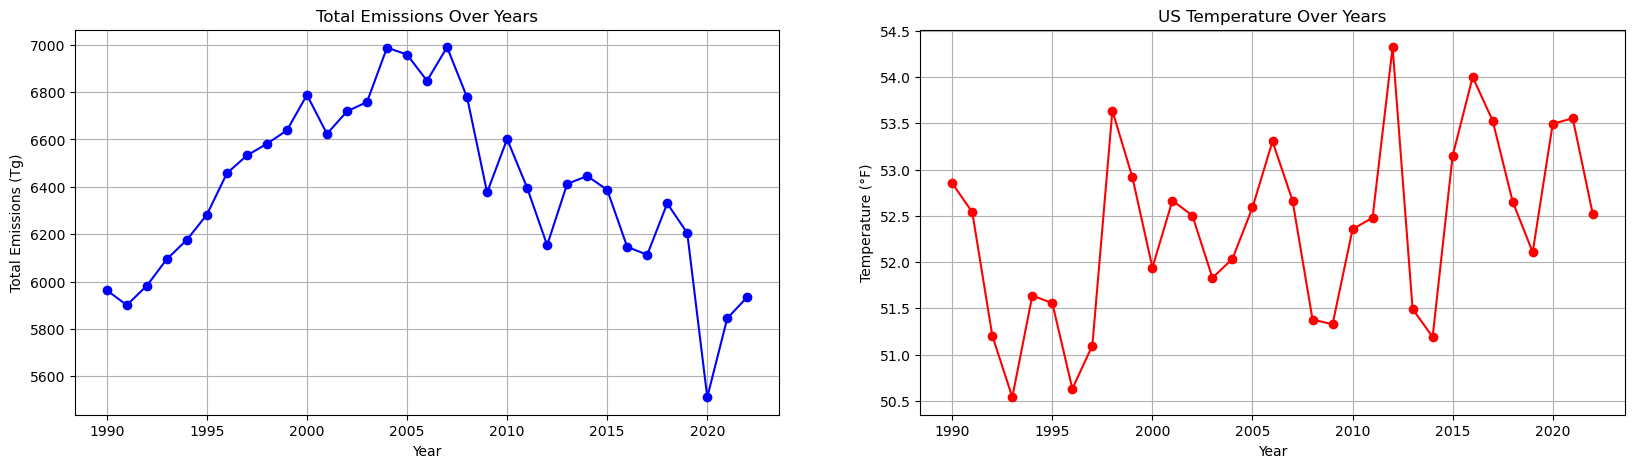

In [ ]:
data = un_sector_melted.groupby(['Year']).agg({'Emissions (Tg)': 'sum', 'Temperature': 'mean'})
years = data.index.values

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

axes[0].plot(years, data['Emissions (Tg)'], marker='o', linestyle='-', color='b')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Emissions (Tg)')
axes[0].set_title('Total Emissions Over Years')
axes[0].grid(True)

axes[1].plot(years, data['Temperature'], marker='o', linestyle='-', color='r')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Temperature (°F)')
axes[1].set_title('US Temperature Over Years')
axes[1].grid(True)

plt.show()

Emissions vs. Temperature
The equation of the regression line is: y = 0.02x + 49.00
Correlation value: 0.3860074778339057
R-squared value: 0.1490017729436931

Emissions vs. Temperature Shifted by 2 Years
The equation of the regression line is: y = 0.03x + 48.92
Correlation value: 0.3860074778339057
R-squared value: 0.15149596904300977


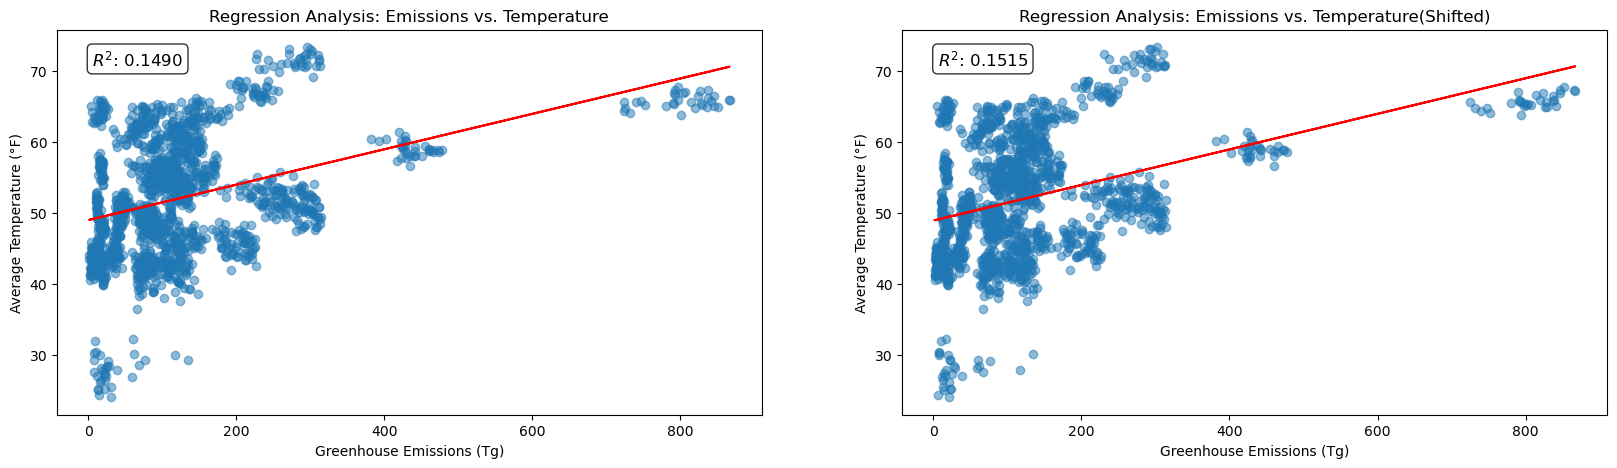

In [ ]:
# Load needed packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

data = un_sector_melted.groupby(['Year','State']).agg({'Emissions (Tg)': 'sum', 'Temperature': 'mean'})
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Split the data into features (X) and target (y)
X = data['Emissions (Tg)'].values.reshape(-1, 1)
y = data['Temperature'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print("Emissions vs. Temperature")
# Print the line of best fit equation
slope = model.coef_[0]
intercept = model.intercept_
print(f"The equation of the regression line is: y = {slope:.2f}x + {intercept:.2f}")
# Calculate correlation coefficient
correlation = np.corrcoef(X.flatten(), y)[0, 1]
print(f"Correlation value: {correlation}")
# Calculate R-squared to assess the model
r2 = r2_score(y, y_pred)
print(f"R-squared value: {r2}")



axes[0].scatter(X, y, label='Actual Data', alpha=0.5)
axes[0].plot(X, y_pred, color='red', label='Regression Line')
axes[0].text(0.05, 0.95, f'$R^2$: {r2:.4f}', transform=axes[0].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
axes[0].set_xlabel('Greenhouse Emissions (Tg)')
axes[0].set_ylabel('Average Temperature (°F)')
axes[0].set_title('Regression Analysis: Emissions vs. Temperature')
# axes[0].legend()

data['Temperature_Shift_2'] = data['Temperature'].shift(2*49)
data.dropna(inplace=True)
X_shifted = data['Emissions (Tg)'].values.reshape(-1, 1)
y_shifted = data['Temperature_Shift_2'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X_shifted, y_shifted)
y_pred_shifted = model.predict(X_shifted)
print("\nEmissions vs. Temperature Shifted by 2 Years")
# Print the line of best fit equation
slope = model.coef_[0]
intercept = model.intercept_
print(f"The equation of the regression line is: y = {slope:.2f}x + {intercept:.2f}")
# Calculate correlation coefficient
correlation = np.corrcoef(X.flatten(), y)[0, 1]
print(f"Correlation value: {correlation}")
# Calculate R-squared to assess the model
r2 = r2_score(y_shifted, y_pred_shifted)
print(f"R-squared value: {r2}")

# Highlight the outliers in pink
axes[1].scatter(X_shifted, y_shifted, label='Actual Data', alpha=0.5)
axes[1].plot(X_shifted, y_pred_shifted, color='red', label='Regression Line')
axes[1].text(0.05, 0.95, f'$R^2$: {r2:.4f}', transform=axes[1].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
axes[1].set_xlabel('Greenhouse Emissions (Tg)')
axes[1].set_ylabel('Average Temperature (°F)')
axes[1].set_title('Regression Analysis: Emissions vs. Temperature(Shifted)')
# axes[1].legend()

plt.show();

# Hypothesis Two

Hypothesis: Climate change does not increase at the same rate as greenhouse gas emissions.

For this hypothesis, we calculated the percentage change in total emissions and average temperature over time. These percentage changes were plotted together to observe whether the rates of increase or decrease followed similar trends. We further tested this by shifting the temperature data by a few years to account for possible delayed effects and compared it with the emissions data.

Cumulative Emissions vs. Temperature
The equation of the regression line is: y = 0.00x + 50.11
R-squared value: 0.10392319178641418
Correlation value: 0.3223712018565155


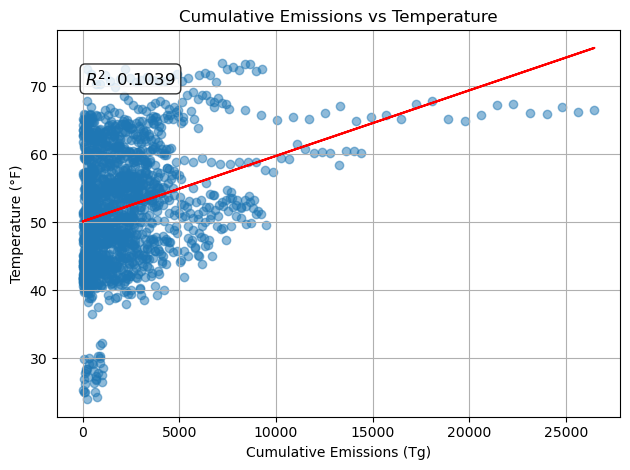

In [ ]:
# Calculate cumulative emissions for each state by year
un_sector_melted['Cumulative Emissions (Tg)'] = un_sector_melted.groupby('State')['Emissions (Tg)'].cumsum()
data = un_sector_melted.groupby(['Year','State']).agg({'Emissions (Tg)': 'sum', 'Temperature': 'mean'})
data['Cumulative Emissions (Tg)'] = data.groupby('State')['Emissions (Tg)'].cumsum()
data

# Plot cumulative emissions vs temperature
plt.scatter(data['Cumulative Emissions (Tg)'], data['Temperature'], alpha=0.5)
plt.xlabel('Cumulative Emissions (Tg)')
plt.ylabel('Temperature (°F)')
plt.title('Cumulative Emissions vs Temperature')
plt.grid(True)

# Fit a linear regression model
X = data['Cumulative Emissions (Tg)'].values.reshape(-1, 1)
y = data['Temperature'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot the regression line
plt.plot(data['Cumulative Emissions (Tg)'], y_pred, color='red', label='Regression Line')

# Calculate R-squared to assess the model
r2 = r2_score(y, y_pred)
plt.text(0.05, 0.90, f'$R^2$: {r2:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
print("Cumulative Emissions vs. Temperature")
# Print the line of best fit equation
slope = model.coef_[0]
intercept = model.intercept_
print(f"The equation of the regression line is: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared value: {r2}")
# Calculate correlation coefficient
correlation = data['Cumulative Emissions (Tg)'].corr(data['Temperature'])
print(f"Correlation value: {correlation}")
plt.tight_layout()
plt.show();

# Hypothesis 3

Hypothesis: An environmental protection act (e.g., the 2007 Massachusetts vs. EPA ruling) had a positive effect on climate change by reducing emissions and slowing climate change.

To investigate this hypothesis, we analyzed the annual trends in emissions and temperature before and after 2007. We calculated cumulative emissions over time for each state and visualized emissions trends categorized by greenhouse gas types. Using subplots for each state, we observed how emissions changed over the years and how the data might correlate with the introduction of environmental regulations.

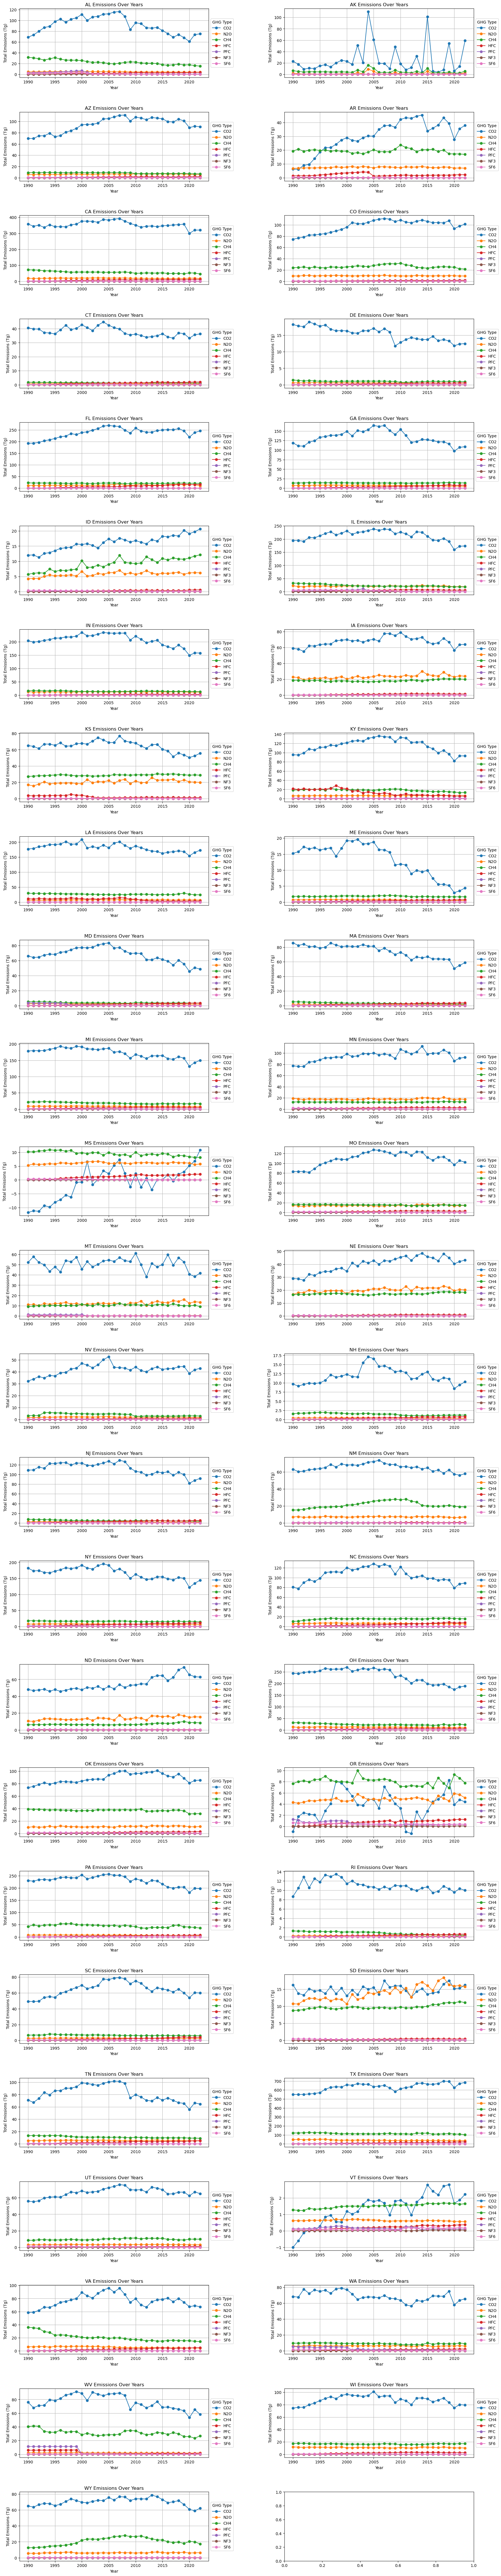

In [30]:
data = un_sector_melted.groupby(['Year']).agg({'Emissions (Tg)': 'sum', 'Temperature': 'mean'})
years = data.index.values

fig, axes = plt.subplots(25, 2, figsize=(20, 100))

for i, state in enumerate(state_abbrev):
    row, col = divmod(i, 2)
    state_data = un_sector_melted[un_sector_melted['State'] == state]
    state_data = state_data.groupby(['Year']).agg({'Emissions (Tg)': 'sum', 'Temperature': 'mean'})
    
    # Plot Emissions
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Total Emissions (Tg)')
    axes[row, col].set_title(f'{state} Emissions Over Years')
    axes[row, col].grid(True)
    
    # Plot Emissions for different GHG types
    ghg_types = un_sector_melted['GHG'].unique()
    for ghg in ghg_types:
        ghg_data = un_sector_melted[(un_sector_melted['State'] == state) & (un_sector_melted['GHG'] == ghg)]
        ghg_data = ghg_data.groupby(['Year']).agg({'Emissions (Tg)': 'sum'})
        axes[row, col].plot(ghg_data.index, ghg_data['Emissions (Tg)'], marker='o', linestyle='-', label=ghg)
    
    axes[row, col].legend(title='GHG Type', loc='center left', bbox_to_anchor=(1, 0.5))

fig.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05, hspace=0.5, wspace=0.4)

plt.show();

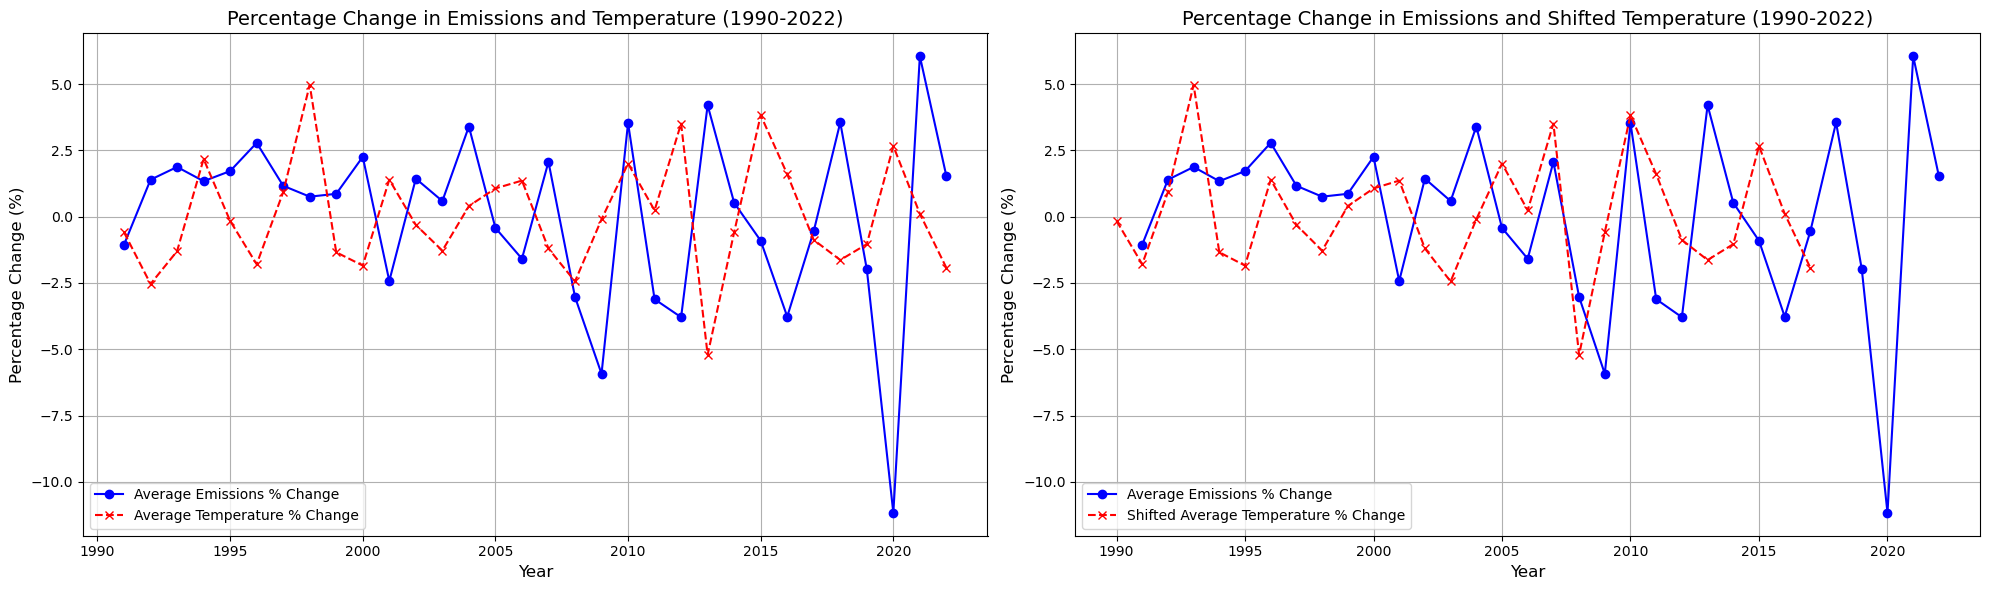

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure unique combination of 'Year' and 'State'
un_sector_melted_unique = un_sector_melted.groupby(['Year']).agg({'Emissions (Tg)': 'sum', 'Temperature': 'mean'})

# Calculate percentage change for emissions and temperature data
emissions_pct_change = un_sector_melted_unique['Emissions (Tg)'].pct_change() * 100
temperature_pct_change = un_sector_melted_unique['Temperature'].pct_change() * 100

# Years for plotting
years = emissions_pct_change.index

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot emissions percentage change
axes[0].plot(years, emissions_pct_change, label='Average Emissions % Change', marker='o', linestyle='-', color='blue')
axes[0].plot(years, temperature_pct_change, label='Average Temperature % Change', marker='x', linestyle='--', color='red')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Percentage Change (%)', fontsize=12)
axes[0].set_title('Percentage Change in Emissions and Temperature (1990-2022)', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True)

# Shift temperature percentage change back by 2 years
temperature_pct_change_shifted = temperature_pct_change.shift(-5)

# Plot shifted temperature percentage change
axes[1].plot(years, emissions_pct_change, label='Average Emissions % Change', marker='o', linestyle='-', color='blue')
axes[1].plot(years, temperature_pct_change_shifted, label='Shifted Average Temperature % Change', marker='x', linestyle='--', color='red')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Percentage Change (%)', fontsize=12)
axes[1].set_title('Percentage Change in Emissions and Shifted Temperature (1990-2022)', fontsize=14)
axes[1].legend(fontsize=10)
axes[1].grid(True)

plt.tight_layout()
plt.show();


# Hypothesis One Results

The empirical evidence regarding Hypothesis 1, which postulated a direct relationship between greenhouse gas emissions and temperature elevation in the United States, demonstrates limited statistical correlation. Quantitative analysis through linear regression yielded a coefficient of determination (R-squared) of 0.149, indicating that variations in greenhouse gas emissions account for merely 14.9% of observed temperature fluctuations. While the regression model produced a positive coefficient of 0.02, suggesting a nominal positive association between emissions and temperature, the correlation coefficient of 0.386 indicates a statistically weak relationship. Furthermore, the implementation of a two-year temporal lag in temperature response marginally improved the R-squared value to 0.151, failing to substantially strengthen the hypothesized relationship.

# Hypothesis Two Results

The analysis of Hypothesis 2, regarding the disparity between rates of climate change and greenhouse gas emissions, provides robust evidence supporting the initial hypothesis. The temporal analysis of percentage changes reveals fundamentally distinct patterns between emissions and temperature trajectories. Emissions data exhibits pronounced variability, notably characterized by a significant decline circa 2020, while temperature fluctuations maintain comparatively moderate oscillations. This behavior is present in both concurrent and temporally shifted analyses, supporting the conclusion that the relationship between emissions and temperature modifications operates through complex, non-linear mechanisms.

# Hypothesis Three Results

The examination of Hypothesis 3, regarding the efficacy of environmental protection legislation, particularly the 2007 Massachusetts vs. EPA ruling, reveals noteworthy trends in emissions reduction. Our collected state-level data demonstrates a consistent decline in carbon dioxide emissions post-2007, with particular significance in high-population states such as California. Aggregate emissions data indicates a substantial reduction from approximately 7,000 Tg to 6,000 Tg by 2020, marking a clear downward trajectory initiated around 2005-2007. However, the absence of a corresponding decisive decrease in temperature measurements suggests that while regulatory frameworks have effectively curtailed emissions, temperature responses are subject to more comprehensive global climate dynamics that extend beyond the scope of localized emission control measures.